<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
import pandas as pd

In [180]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [181]:
# food_nutrition.info()
food_nutrition.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Potassium,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,51,17,0.17,61,0.05,0.011,5.0,0.014,0.08,0.3
1,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,157,39,0.42,59,0.56,0.060,0.1,0.057,0.03,0.2
2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,253,3,0.38,29,0.36,0.034,0.9,0.020,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3


In [182]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             92 non-null     int64 
 1   disease                92 non-null     object
 2   ineficient_nutritions  92 non-null     object
 3   Precaution_1           92 non-null     object
 4   Precaution_2           84 non-null     object
 5   Precaution_3           65 non-null     object
 6   Precaution_4           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [183]:
# food_nutrition.fillna(value = 0, inplace = True)
# food_nutrition = food_nutrition[food_nutrition["Description"].str.contains("Beaf") == False]

**Part-1**

In [184]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [185]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: chicken pox
Precauctions:  ['use neem in bathing ', 'consume neem leaves', 'take vaccine', 'avoid public places']
Ineficient Nnutritions:  ['SaturatedFat', 'Magnesium', 'Potassium', 'Calcium']


**Part-2**

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

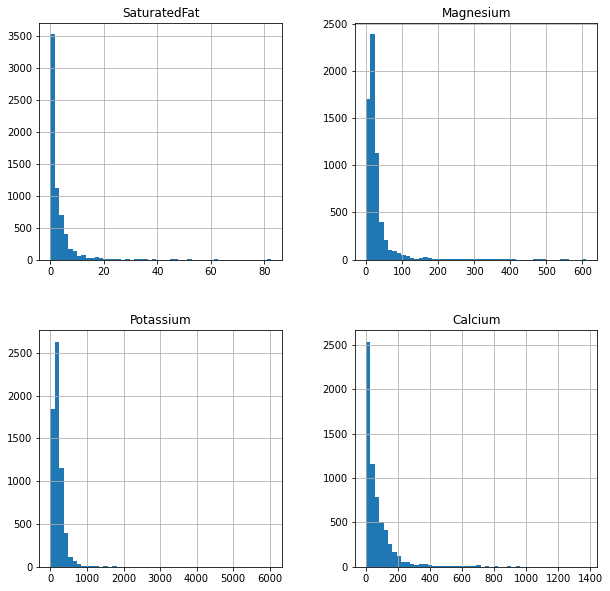

In [187]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [188]:
from sklearn.preprocessing import MinMaxScaler

In [189]:
columns_to_cluster = dis_list

In [190]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.00490998 0.00844371 0.02327273]


In [191]:
columns_to_cluster_scaled = []
for i in dis_list:
  columns_to_cluster_scaled.append(i+"_scaled")

In [192]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

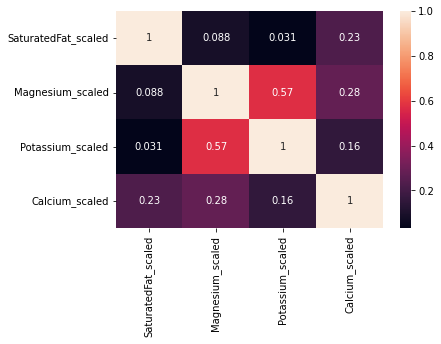

In [193]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [195]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)                                                             #calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.7579973598187983
Number of Clusters = 3, Silhouette Score = 0.7420823490255691
Number of Clusters = 4, Silhouette Score = 0.4705303608982576
Number of Clusters = 5, Silhouette Score = 0.4525445757681445
Number of Clusters = 6, Silhouette Score = 0.47447609419068243
Number of Clusters = 7, Silhouette Score = 0.3803424093207827
Number of Clusters = 8, Silhouette Score = 0.3788695346569771
Number of Clusters = 9, Silhouette Score = 0.41093923695940554
Number of Clusters = 10, Silhouette Score = 0.28101922490620956
Number of Clusters = 11, Silhouette Score = 0.28496998738182633
Number of Clusters = 12, Silhouette Score = 0.2983179152919078
Number of Clusters = 13, Silhouette Score = 0.2847625774963133
Number of Clusters = 14, Silhouette Score = 0.30023452692633573
Number of Clusters = 15, Silhouette Score = 0.29962525011178603
Number of Clusters = 16, Silhouette Score = 0.3033148637150835
Number of Clusters = 17, Silhouette Score = 0.30655360109

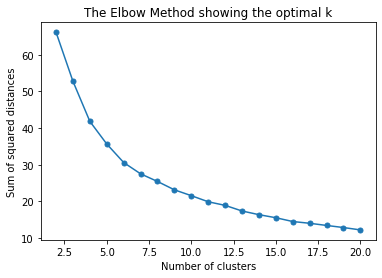

In [196]:
plt.plot(n_clusters, ssd, marker='.', markersize=10,animated=True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [197]:
# kk=[]
# for i in range(len(sc)-1):
#   kk.append(sc[i]-sc[i+1])
# k=kk.index(max(kk))+3

In [198]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [0 5 5 0 5 5 5 5 5 5]


**Visualizing the clusters**

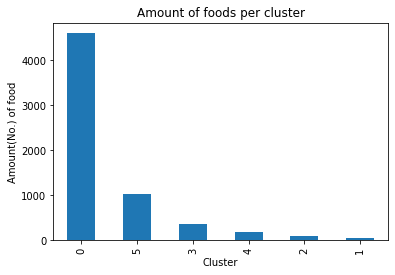

In [199]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [200]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

0    4600
5    1028
3     355
4     182
2     105
1      62
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  62


In [201]:
df_food_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SaturatedFat_scaled  6332 non-null   float64
 1   Magnesium_scaled     6332 non-null   float64
 2   Potassium_scaled     6332 non-null   float64
 3   Calcium_scaled       6332 non-null   float64
 4   cluster              6332 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 222.7 KB


In [202]:
food_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   int64  
 4   Cryptoxanthin           6332 non-null   int64  
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   int64  
 7   Choline                 6332 non-null   float64
 8   Fiber                   6332 non-null   float64
 9   Lutein and Zeaxanthin   6332 non-null   int64  
 10  Lycopene                6332 non-null   int64  
 11  Niacin                  6332 non-null   float64
 12  Protein                 6332 non-null   float64
 13  Retinol                 6332 non-null   int64  
 14  Riboflavin              6332 non-null   

In [203]:
# for i in dis_list:
#   food_nutrition=food_nutrition.drop([i], axis = 1)
  
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Crab soup, cream of, prepared with milk"
0,"Egg omelet or scrambled egg, with meat and veg..."
0,"Egg omelet or scrambled egg, made with margarine"
0,Kung Pao shrimp
0,"Cheese, cottage, salted, dry curd"
0,"Bananas and pineapple, baby food, junior"
0,"Lasagna with meat, canned"
0,Whopper Jr (Burger King)
0,"Fruit flavored drink, powdered, reconstituted"


,Description
cluster,
1,"Seaweed, dried"
1,Nutritional powder mix (Muscle Milk)
1,Pine nuts
1,Almond butter
1,Nutritional powder mix (Slim Fast)
1,"Pumpkin seeds, salted"
1,"Papad, grilled or broiled"
1,"Cashews, unroasted"
1,"Coffee, instant, not reconstituted"


,Description
cluster,
2,"Cheese, Parmesan, dry grated, reduced fat"
2,"Cheese sandwich, American cheese, on wheat bre..."
2,"Whey, sweet, dry"
2,"Yogurt covered fruit snacks candy, with added ..."
2,"Cheese, Muenster"
2,"Queso Anejo, aged Mexican cheese"
2,"Cheese, Cheddar, reduced sodium"
2,"Cheese sandwich, American cheese, on white bre..."
2,Nutrition bar (Snickers Marathon Protein Bar)


,Description
cluster,
3,Hazelnuts
3,"Mackerel, coated, baked or broiled, no added fat"
3,"Popcorn, caramel coated, with nuts"
3,"Pecans, unroasted"
3,"Mexican chocolate, tablet"
3,"Pistachio nuts, unsalted"
3,"White beans, from canned, no added fat"
3,Soy chips
3,"Pink beans, cooked"


,Description
cluster,
4,"Croissant, cheese"
4,"Popcorn, microwave, plain"
4,"Milk chocolate candy, with almonds"
4,MILKY WAY Bar
4,Lobster newburg
4,"Margarine-oil blend, stick"
4,Sesame oil
4,Corn oil
4,Thuringer


,Description
cluster,
5,"Pastry, cheese-filled"
5,"Egg, cheese and bacon on bagel"
5,Taquito or flauta with cheese
5,"Soft taco with meat and sour cream, from fast ..."
5,"Swiss steak, with gravy, meatless"
5,"Waffle, whole grain"
5,"Infant formula, NS as to form (Gerber Graduate..."
5,"Almond milk, sweetened"
5,"Grilled cheese sandwich, Cheddar cheese, on wh..."


In [204]:
df_food_joined.head(5)
df_food_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 4
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   int64  
 4   Cryptoxanthin           6332 non-null   int64  
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   int64  
 7   Choline                 6332 non-null   float64
 8   Fiber                   6332 non-null   float64
 9   Lutein and Zeaxanthin   6332 non-null   int64  
 10  Lycopene                6332 non-null   int64  
 11  Niacin                  6332 non-null   float64
 12  Protein                 6332 non-null   float64
 13  Retinol                 6332 non-null   int64  
 14  Riboflavin              6332 non-null   flo

**Applying PCA to visualize the clusters**

In [205]:
from sklearn.decomposition import PCA

In [206]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [207]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3']


In [208]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   cluster  6332 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 222.7 KB


In [209]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    62
5    62
2    62
1    62
4    62
3    62
Name: cluster, dtype: int64

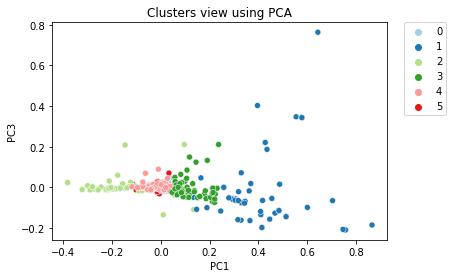

In [210]:
sns.scatterplot(x='PC1', y='PC3', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [211]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Meat with barbecue sauce, NS as to type of meat"
0,"Sweet potato, boiled, made with margarine"
0,"Alfalfa sprouts, raw"
0,"Cereal, baby food, jarred, NFS"
0,"Lemonade, fruit juice drink, light"
0,"Pasta, whole grain, with tomato-based sauce an..."
0,"Potato salad with egg, made with Italian dressing"
0,"Pie, custard, individual size or tart"
0,"Cereal, nestum"


,Description
cluster,
5,"Pudding, flavors other than chocolate, made fr..."
5,"Egg omelet or scrambled egg, with cheese, meat..."
5,Salmon cake or patty
5,"Burrito with meat, beans, rice, and sour cream"
5,"Mustard greens, NS as to form, cooked"
5,"Sour cream, regular"
5,"Cheese sandwich, Cheddar cheese, on wheat brea..."
5,Cheese ball
5,"Lambsquarter, cooked"


,Description
cluster,
2,"Barley cereal, baby food, dry, instant"
2,Cereal or granola bar (Kellogg's Nutri-Grain Y...
2,"Cheese sandwich, American cheese, on wheat bre..."
2,Topping from cheese pizza
2,Cereal (General Mills Kix)
2,"Cheese, Feta"
2,"Whole wheat cereal with apples, baby food, dry..."
2,"Cheese sandwich, American cheese, on wheat bre..."
2,"Nutritional powder mix, protein, light, NFS"


,Description
cluster,
1,"Almond butter, lower sodium"
1,Molasses
1,"Nutritional powder mix, whey based, NFS"
1,"Coffee, instant, not reconstituted"
1,"Nutritional powder mix, high protein, NFS"
1,"Cashews, unsalted"
1,"Almonds, flavored"
1,"Nutritional powder mix, sugar free (Carnation ..."
1,Chia seeds


,Description
cluster,
4,"Cookie, chocolate chip, made from home recipe ..."
4,"Lamb, ribs, cooked, NS as to fat eaten"
4,"Milk chocolate candy, with almonds"
4,Hollandaise sauce
4,"Coconut cream, canned, sweetened"
4,3 Musketeers Truffle Crisp Bar
4,"Cookie, chocolate, with icing or coating"
4,"Cake, pound, Puerto Rican style"
4,"Ranch dip, regular"


,Description
cluster,
3,"Potato chips, barbecue flavored"
3,Fish sauce
3,"Tortilla chips, flavored"
3,"Mixed nuts, honey roasted"
3,"Cookie, peanut butter, with chocolate"
3,"White beans, from dried, no added fat"
3,Cereal (Kashi Autumn Wheat)
3,"Cereal (Quaker Granola with Oats, Honey, and R..."
3,"Peanuts, boiled"


In [212]:
# df_user_food_joined.info()
df_user_food_joined.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat_scaled,Magnesium_scaled,Potassium_scaled,Calcium_scaled
cluster,,,,,,,,,,,,,,,,,,,,,
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,0.05,0.011,5.0,0.014,0.08,0.3,0.024352,0.004910,0.008444,0.023273
5,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,0.56,0.060,0.1,0.057,0.03,0.2,0.014109,0.019640,0.025993,0.091636
5,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,0.54,0.061,0.0,0.056,0.05,0.3,0.022545,0.019640,0.024834,0.089455
0,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,0.36,0.034,0.9,0.020,0.08,0.3,0.026109,0.008183,0.041887,0.073455
5,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,0.54,0.061,0.0,0.056,0.05,0.3,0.022545,0.019640,0.024834,0.089455


**Recommending Food**

In [213]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    14.529375
5     3.246999
3     1.121289
4     0.574858
2     0.331649
1     0.195831
Name: cluster, dtype: float64

Total food:  20


In [214]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat_scaled,Magnesium_scaled,Potassium_scaled,Calcium_scaled
0,0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,...,0.05,0.011,5.0,0.014,0.08,0.3,0.024352,0.00491,0.008444,0.023273
1,5,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,...,0.56,0.060,0.1,0.057,0.03,0.2,0.014109,0.01964,0.025993,0.091636
2,5,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,...,0.54,0.061,0.0,0.056,0.05,0.3,0.022545,0.01964,0.024834,0.089455


In [215]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K,cluster_pct
0,0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,...,17,0.17,61,0.05,0.011,5.0,0.014,0.08,0.3,14.529375
1,5,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,...,39,0.42,59,0.56,0.060,0.1,0.057,0.03,0.2,3.246999
2,5,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,...,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3,3.246999


In [216]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
# final_Food.head(10)

In [217]:
final_Food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cluster                 20 non-null     int64  
 1   Category                20 non-null     object 
 2   Description             20 non-null     object 
 3   NutrientDataBankNumber  20 non-null     int64  
 4   Carotene                20 non-null     int64  
 5   Cryptoxanthin           20 non-null     int64  
 6   Carbohydrate            20 non-null     float64
 7   Cholesterol             20 non-null     int64  
 8   Choline                 20 non-null     float64
 9   Fiber                   20 non-null     float64
 10  Lutein and Zeaxanthin   20 non-null     int64  
 11  Lycopene                20 non-null     int64  
 12  Niacin                  20 non-null     float64
 13  Protein                 20 non-null     float64
 14  Retinol                 20 non-null     int6

**Appying Random Forest**

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [219]:
X=df_food_scaled[columns_to_cluster_scaled]   # Features
y=df_food_scaled['cluster']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [220]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
#Train the model using the training sets 
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [221]:
clf.estimators_[0]
sample_tree = clf.estimators_[4]

In [222]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [223]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['K1', 'K2','K3', 'K4','K5', 'K6'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

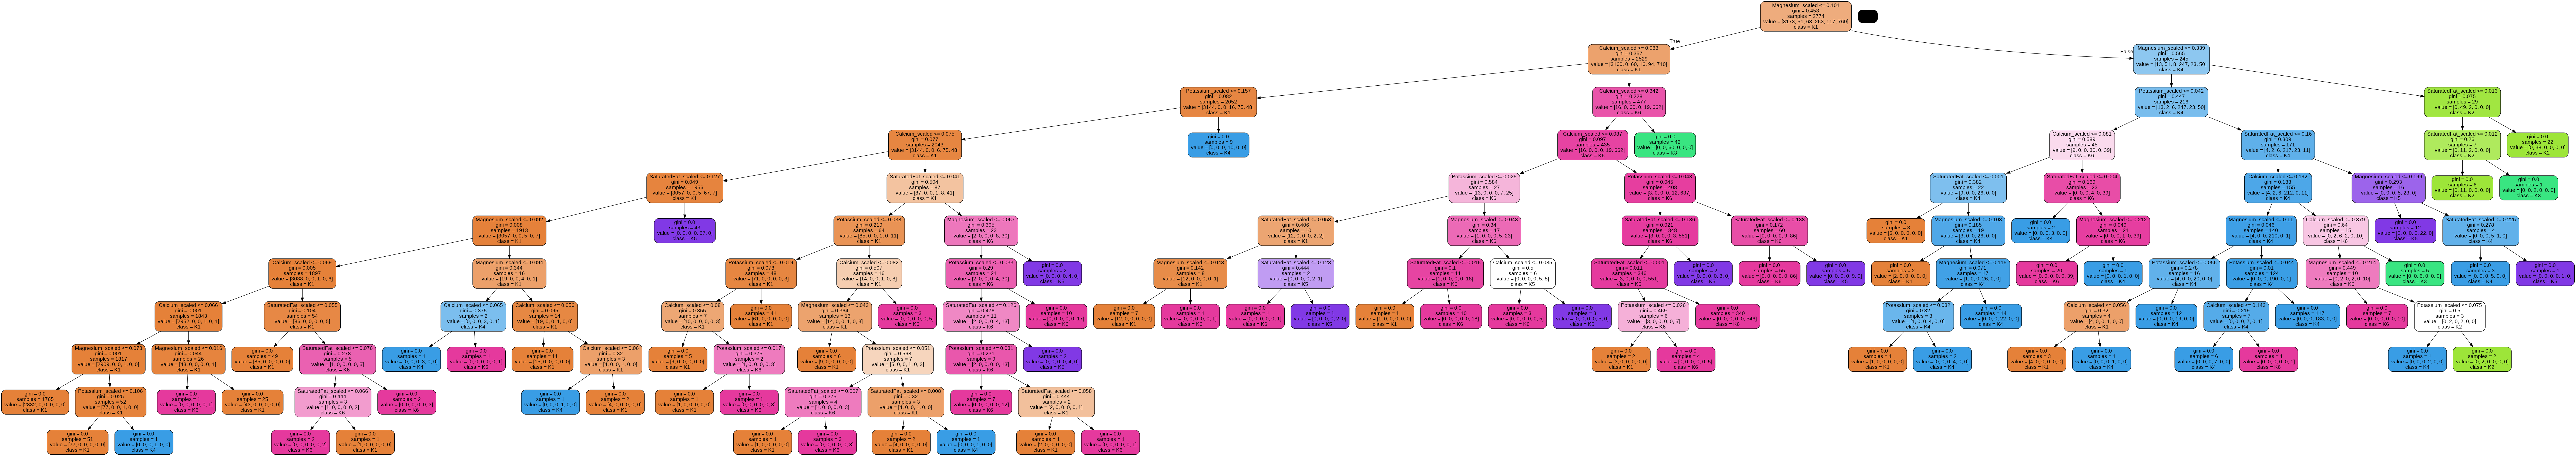

In [224]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [225]:
clf.feature_importances_

array([0.16299698, 0.22131398, 0.04964635, 0.56604269])

In [226]:
imp_df = pd.DataFrame({
    "Nutritions": X_train.columns,
    "Importance": clf.feature_importances_
})

In [227]:
imp_df.sort_values(by="Importance", ascending=False)

,Nutritions,Importance
3,Calcium_scaled,0.566043
1,Magnesium_scaled,0.221314
0,SaturatedFat_scaled,0.162997
2,Potassium_scaled,0.049646


In [228]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [229]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9889473684210527


In [230]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1392,    0,    0,    0,    0,    3],
       [   0,   14,    1,    1,    0,    0],
       [   0,    1,   36,    0,    0,    0],
       [   4,    0,    0,   97,    0,    1],
       [   0,    0,    0,    1,   56,    0],
       [   9,    0,    0,    0,    0,  284]])

In [231]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,)

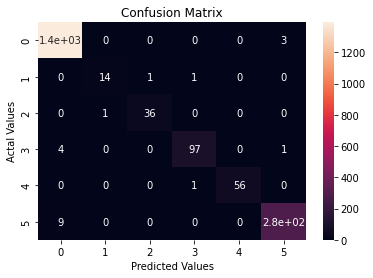

In [232]:
#Plotting the confusion matrix
ax = sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [233]:
final_Food[['Description']]

,Description
0,"Vegetarian vegetable soup, prepared with water"
1,"Chicken, prepackaged or deli, luncheon meat"
2,Seafood souffle
3,Chicken or turkey with cream sauce
4,"Tea, iced, instant, black, decaffeinated, pre-..."
5,"Tea, iced, brewed, black, decaffeinated, pre-s..."
6,"Green beans, fresh, cooked, fat added, NS as t..."
7,"Mullet, baked or broiled, fat added"
8,"Pie, fried, NFS"
9,"Salsa verde or salsa, green"


In [234]:
chartval=[]
for i in columns_to_cluster_scaled:
  chartval.append(final_Food[i].sum())

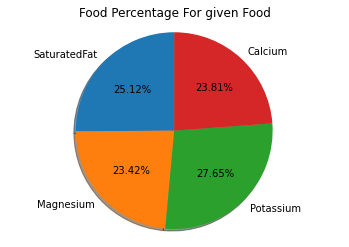

In [235]:
labels= columns_to_cluster
sizes= chartval
plt.pie(sizes,labels=labels, startangle=90, shadow=True,autopct='%1.2f%%')                   # explode=(0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1),
plt.title('Food Percentage For given Food')
plt.axis('equal')
plt.show()

In [236]:
list_of_foods = final_Food['Description'].to_list()
print(list_of_foods)

['Vegetarian vegetable soup, prepared with water', 'Chicken, prepackaged or deli, luncheon meat', 'Seafood souffle', 'Chicken or turkey with cream sauce', 'Tea, iced, instant, black, decaffeinated, pre-sweetened with low calorie sweetener', 'Tea, iced, brewed, black, decaffeinated, pre-sweetened with sugar', 'Green beans, fresh, cooked, fat added, NS as to fat type', 'Mullet, baked or broiled, fat added', 'Pie, fried, NFS', 'Salsa verde or salsa, green', 'Potato tots, fast food / restaurant', 'Italian Ice, no sugar added', 'Broccoflower, cooked', 'Orange-carrot juice, baby food', 'Cookie bar, with chocolate, nuts, and graham crackers', 'Quesadilla with vegetables', 'Yogurt, low fat milk, flavors other than fruit', 'Chocolate milk, made from dry mix with fat free milk', 'Potato chips, fat free', 'Chocolate-flavored sprinkles']
